In [1]:
%matplotlib notebook
import numpy as np
import hublib.rappture as rappture

In [2]:
deck = """
-- In a 1D pattern, the pattern should be specified only with rectangles.
-- The y-dimension of the rectangles is ignored.

S = S4.NewSimulation()
S:SetLattice({1,0}, {0,0}) -- 1D lattice
S:SetNumG(27)

-- Material definition
S:AddMaterial("Silicon", {12,0}) -- real and imag parts
S:AddMaterial("Vacuum", {1,0})

S:AddLayer(
    'AirAbove', --name
    0,          --thickness
    'Vacuum')   --background material
S:AddLayer('Slab', 0.5, 'Vacuum')
S:SetLayerPatternRectangle('Slab',        -- which layer to alter
                           'Silicon',     -- material in rectangle
                           {0,0},         -- center
                           0,             -- tilt angle (degrees)
                           {0.25, 0}) -- half-widths
S:AddLayerCopy('AirBelow', -- new layer name
               0,          -- thickness
               'AirAbove') -- layer to copy

-- E polarized along the grating periodicity direction
S:SetExcitationPlanewave(
    {0,0},  -- incidence angles (spherical coordinates: phi in [0,180], theta in [0,360])
    {0,0},  -- s-polarization amplitude and phase (in degrees)
    {1,0})  -- p-polarization amplitude and phase

--S:UsePolarizationDecomposition()

for freq=0.25,0.7,0.005 do
    S:SetFrequency(freq)

    -- backward should be zero
    forward,backward = S:GetPoyntingFlux('AirBelow', -- layer in which to get
                                         0)          -- z-offset
    print(freq .. '\t' .. forward);
end
"""

In [3]:
io = rappture.Tool("s4sim")
io['input.phase(mode_option).choice(option).current'] = 2
io['input.phase(parameter).group(input_deck).string(deck).current'] = deck

In [4]:
# run the tool
io.run(verbose=True)

cmd= TOOL_PARAMETERS=/home/nanohub/mmh/data/sessions/1139522/driver_8600.hz /apps/s4sim/current/middleware/invoke


In [5]:
io.outputs

<IPython.core.display.Javascript object>


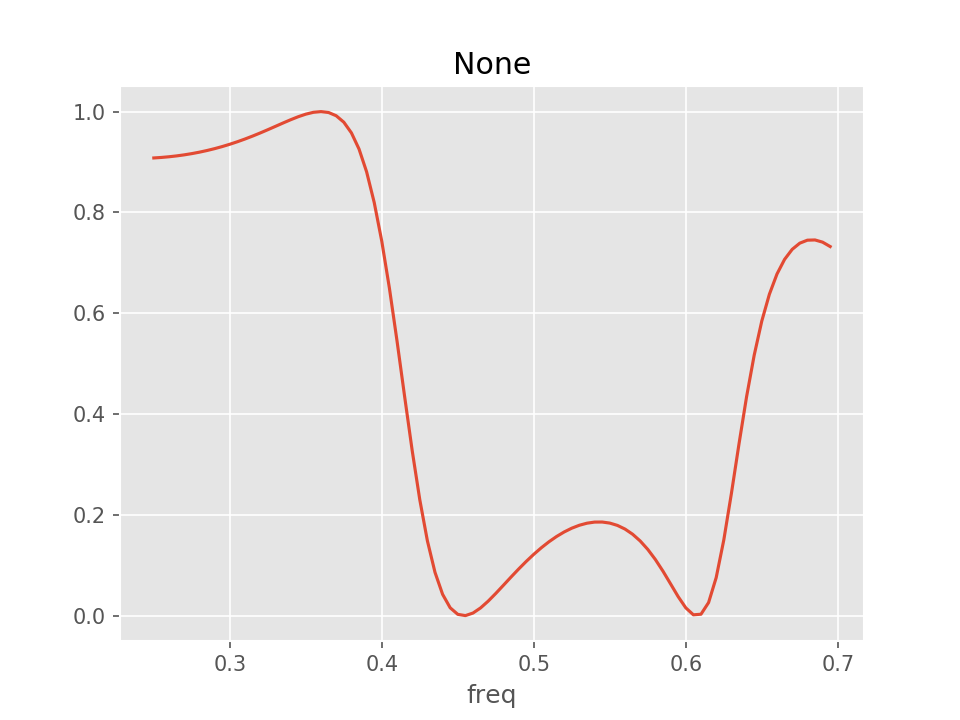

In [6]:
io['output.curve(2)'].plot()